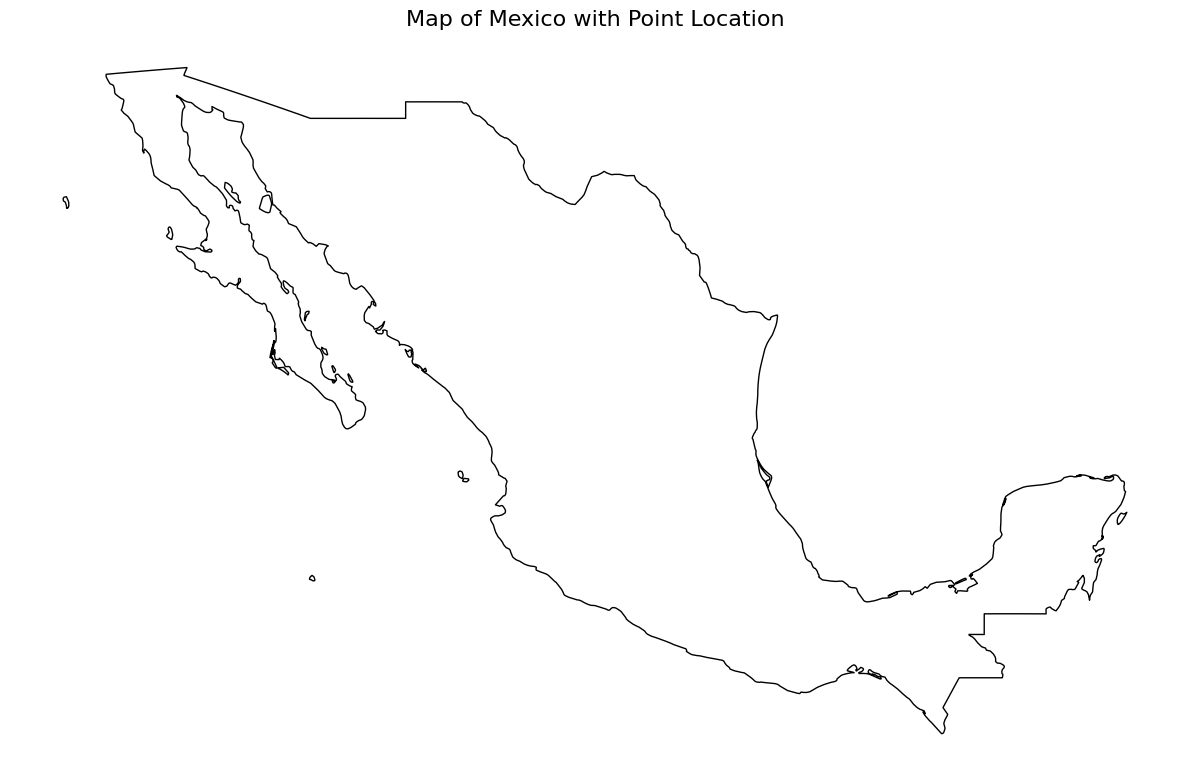

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
world = gpd.read_file('World_Countries_(Generalized)/World_Countries_Generalized.shp')

# Ensure the shapefile is in WGS 84
if world.crs != 'EPSG:4326':
    world = world.to_crs(epsg=4326)


mexico = world[world['COUNTRY'] == 'Mexico']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Mexico
mexico.plot(ax=ax, color='white', edgecolor='black')

# Add a specific point (example: Mexico City coordinates)
# longitude = -99.1332
# latitude = 19.4326
# ax.plot(longitude, latitude, marker='*', color='red', markersize=15, label='Mexico City')

# Add a text label
# ax.annotate('Mexico City', 
#            xy=(longitude, latitude), 
#            xytext=(10, 10),
#            textcoords='offset points',
#            fontsize=12)

# Customize the plot
plt.title('Map of Mexico with Point Location', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
world.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

100%|██████████| 320/320 [00:00<00:00, 405.95it/s]


starting clipping
done clipping
plotting mexico
plotting grid


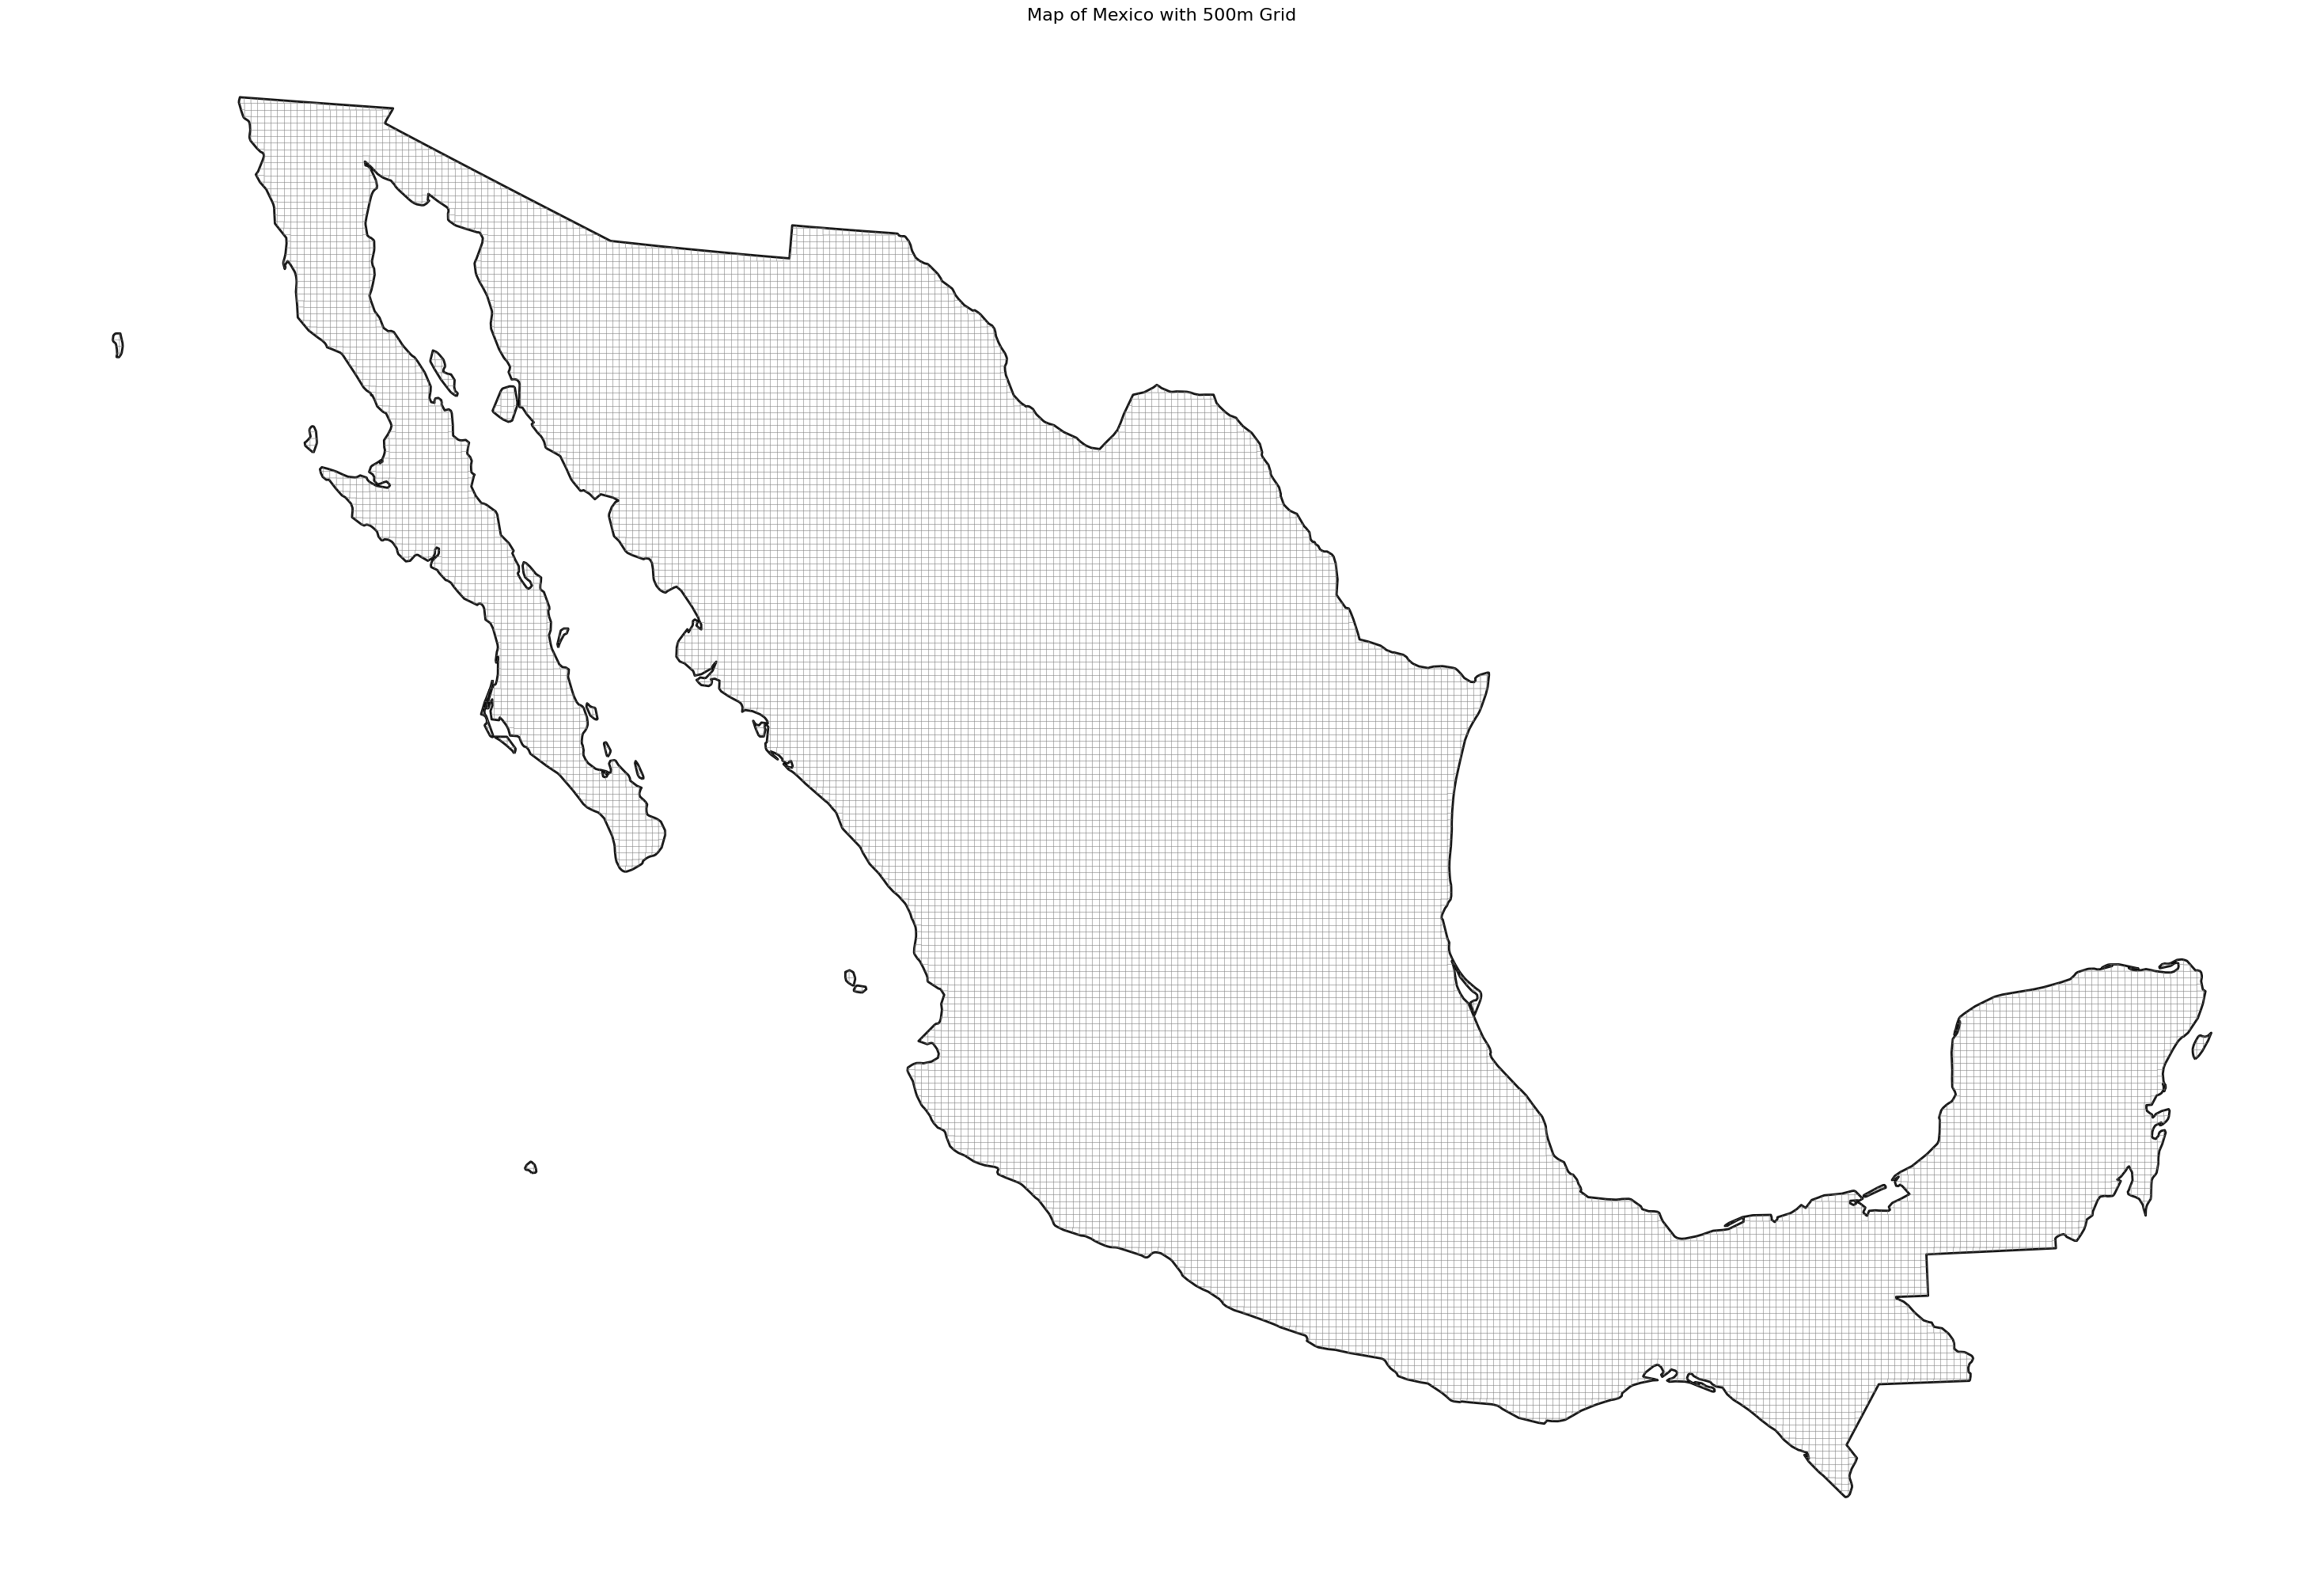

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

from tqdm import tqdm

# Read the shapefile
world = gpd.read_file('World_Countries_(Generalized)/World_Countries_Generalized.shp')

# Ensure the shapefile is in WGS 84
if world.crs != 'EPSG:4326':
    world = world.to_crs(epsg=4326)

# Extract Mexico
mexico = world[world['COUNTRY'] == 'Mexico']

# Convert to a projected CRS (UTM) for accurate 500m grid
# Mexico spans multiple UTM zones, but we'll use zone 14N which covers a significant portion
mexico_utm = mexico.to_crs(epsg=32614)  # UTM Zone 14N

# Get the bounds of Mexico in UTM coordinates
minx, miny, maxx, maxy = mexico_utm.total_bounds

# Create grid cells of 500m
cell_size = 10000  # meters
x_coords = np.arange(minx, maxx, cell_size)
y_coords = np.arange(miny, maxy, cell_size)

# Create grid cells
grid_cells = []
for x in tqdm(x_coords):
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)

# Create GeoDataFrame from grid
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=mexico_utm.crs)

print("starting clipping")
# Clip grid to Mexico's boundary
grid_clipped = gpd.clip(grid, mexico_utm)
print("done clipping")

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot Mexico
print("plotting mexico")
mexico_utm.plot(ax=ax, color='white', edgecolor='black', linewidth=2)

# Plot grid
print("plotting grid")
grid_clipped.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.5, linewidth=0.5)

# Customize the plot
plt.title('Map of Mexico with 500m Grid', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

In [2]:
import geopandas as gpd

world = gpd.read_file('World_Countries_(Generalized)/World_Countries_Generalized.shp')
world.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

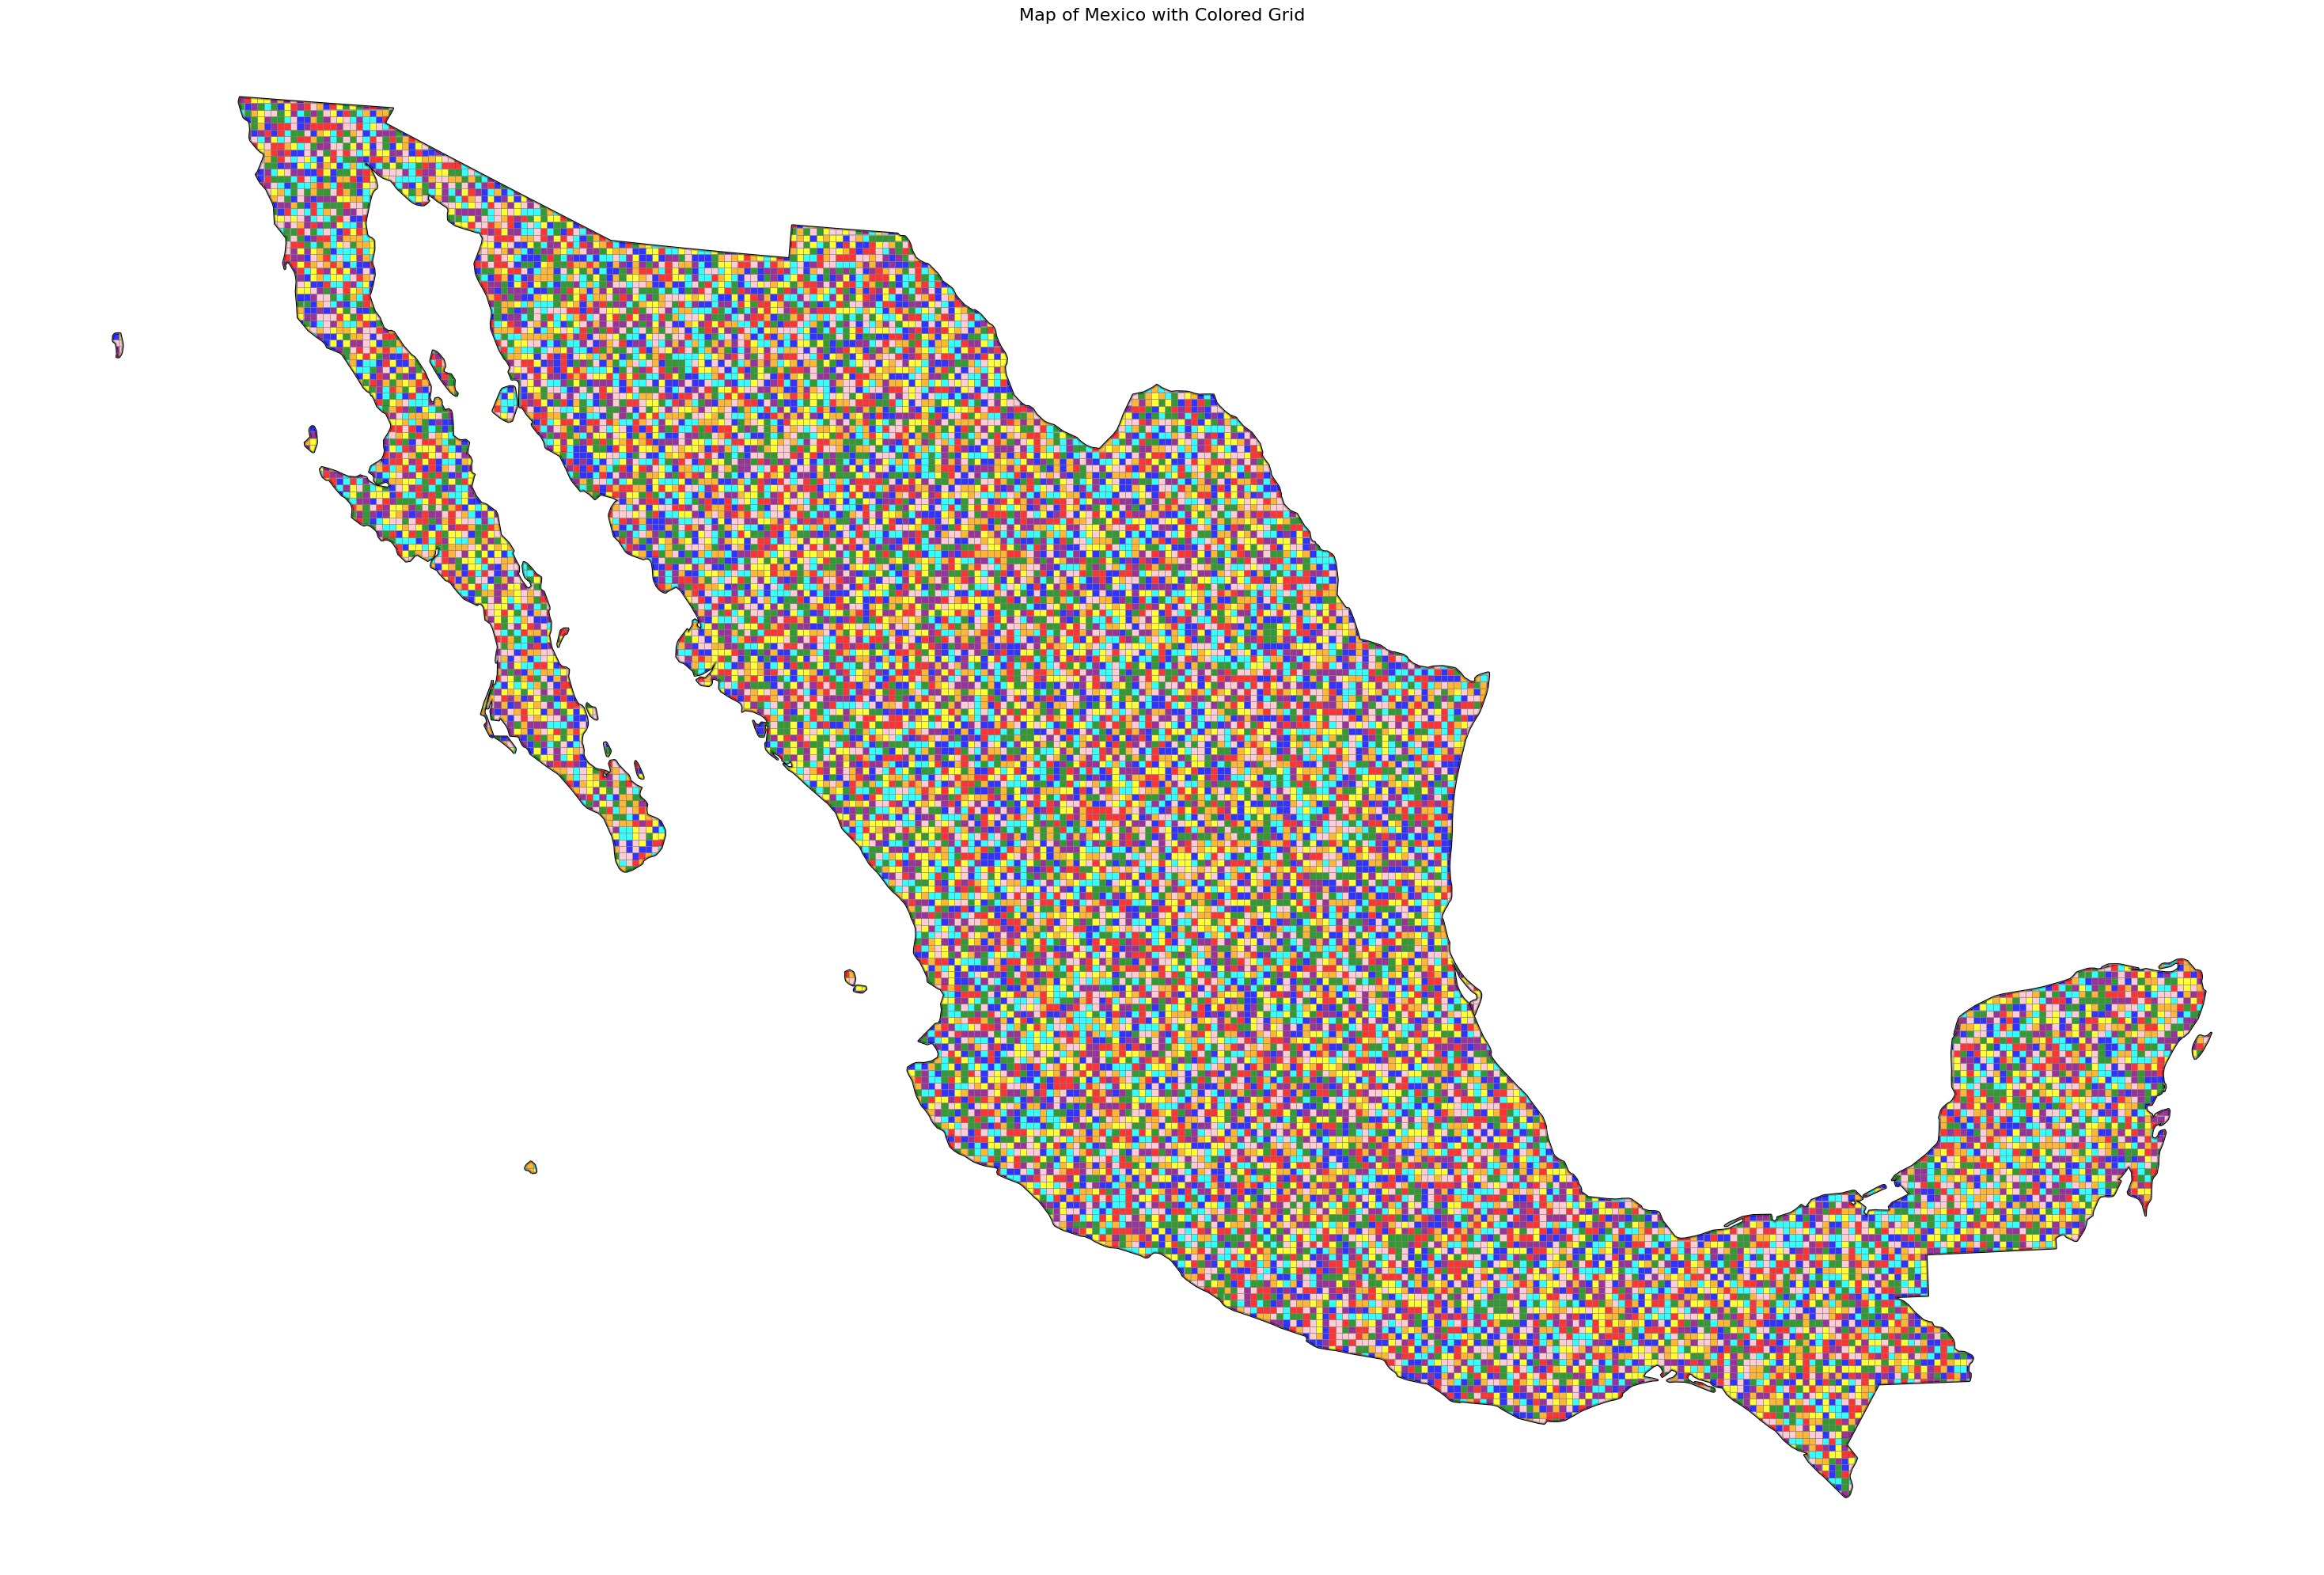

In [3]:
# Example: Assign random colors to specific grid cells
import random

# Create a color map with random choices
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'cyan']
grid_clipped['color'] = [random.choice(colors) for _ in range(len(grid_clipped))]

# Optionally, define specific conditions for coloring
# Example: Color cells in the northern half of the grid differently
# northern_half = grid_clipped.geometry.centroid.y > grid_clipped.geometry.centroid.y.mean()
# grid_clipped.loc[northern_half, 'color'] = 'blue'
# grid_clipped.loc[~northern_half, 'color'] = 'red'

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot Mexico
mexico_utm.plot(ax=ax, color='white', edgecolor='black', linewidth=2)

# Plot grid with specified colors
grid_clipped.plot(ax=ax, facecolor=grid_clipped['color'], edgecolor='grey', alpha=0.8, linewidth=0.5)

# Customize the plot
plt.title('Map of Mexico with Colored Grid', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()


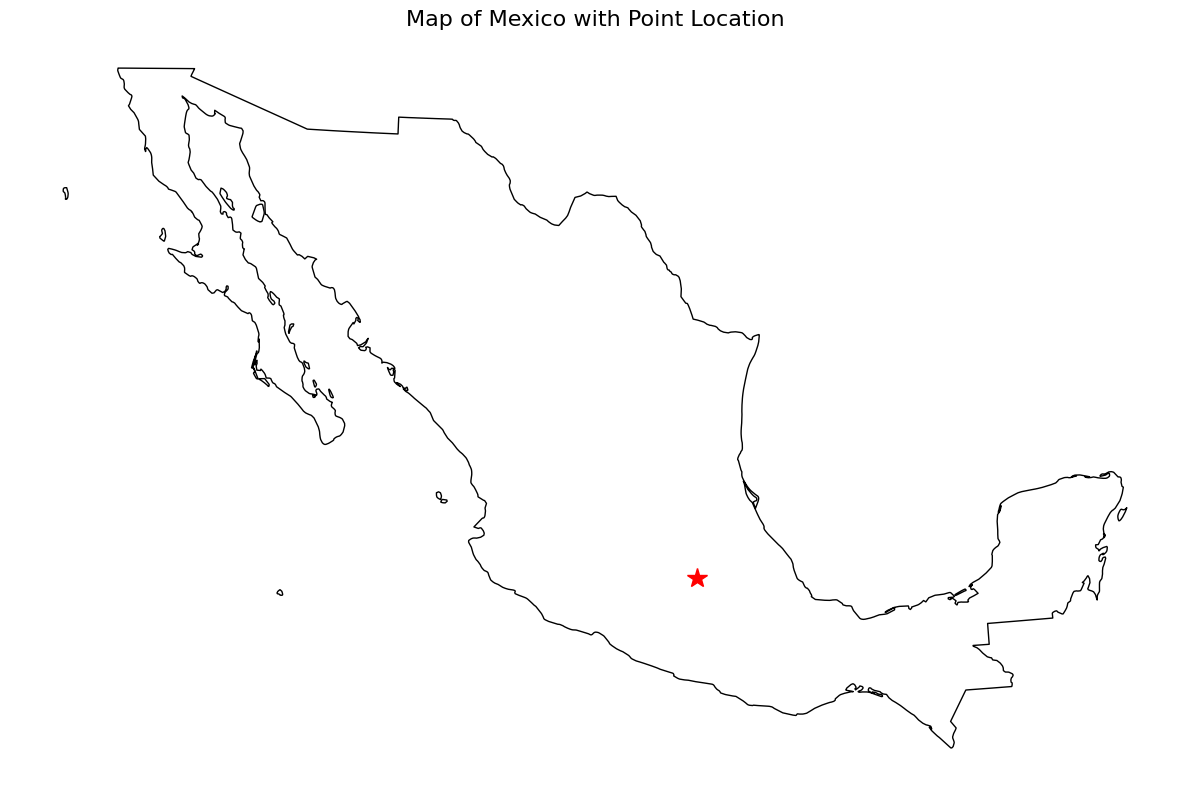

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
world = gpd.read_file('World_Countries_(Generalized)/World_Countries_Generalized.shp')

# Ensure the shapefile is in WGS 84
if world.crs != 'EPSG:6372':
    world = world.to_crs(epsg=6372)


mexico = world[world['COUNTRY'] == 'Mexico']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Mexico
mexico.plot(ax=ax, color='white', edgecolor='black')

# Add a specific point (example: Mexico City coordinates)
longitude = 2800163.325798929
latitude = 829057.5193839237
ax.plot(longitude, latitude, marker='*', color='red', markersize=15, label='Mexico City')

# Add a text label
# ax.annotate('Mexico City', 
#            xy=(longitude, latitude), 
#            xytext=(10, 10),
#            textcoords='offset points',
#            fontsize=12)

# Customize the plot
plt.title('Map of Mexico with Point Location', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 318/318 [00:00<00:00, 377.91it/s]


starting clipping
done clipping
plotting mexico
plotting grid


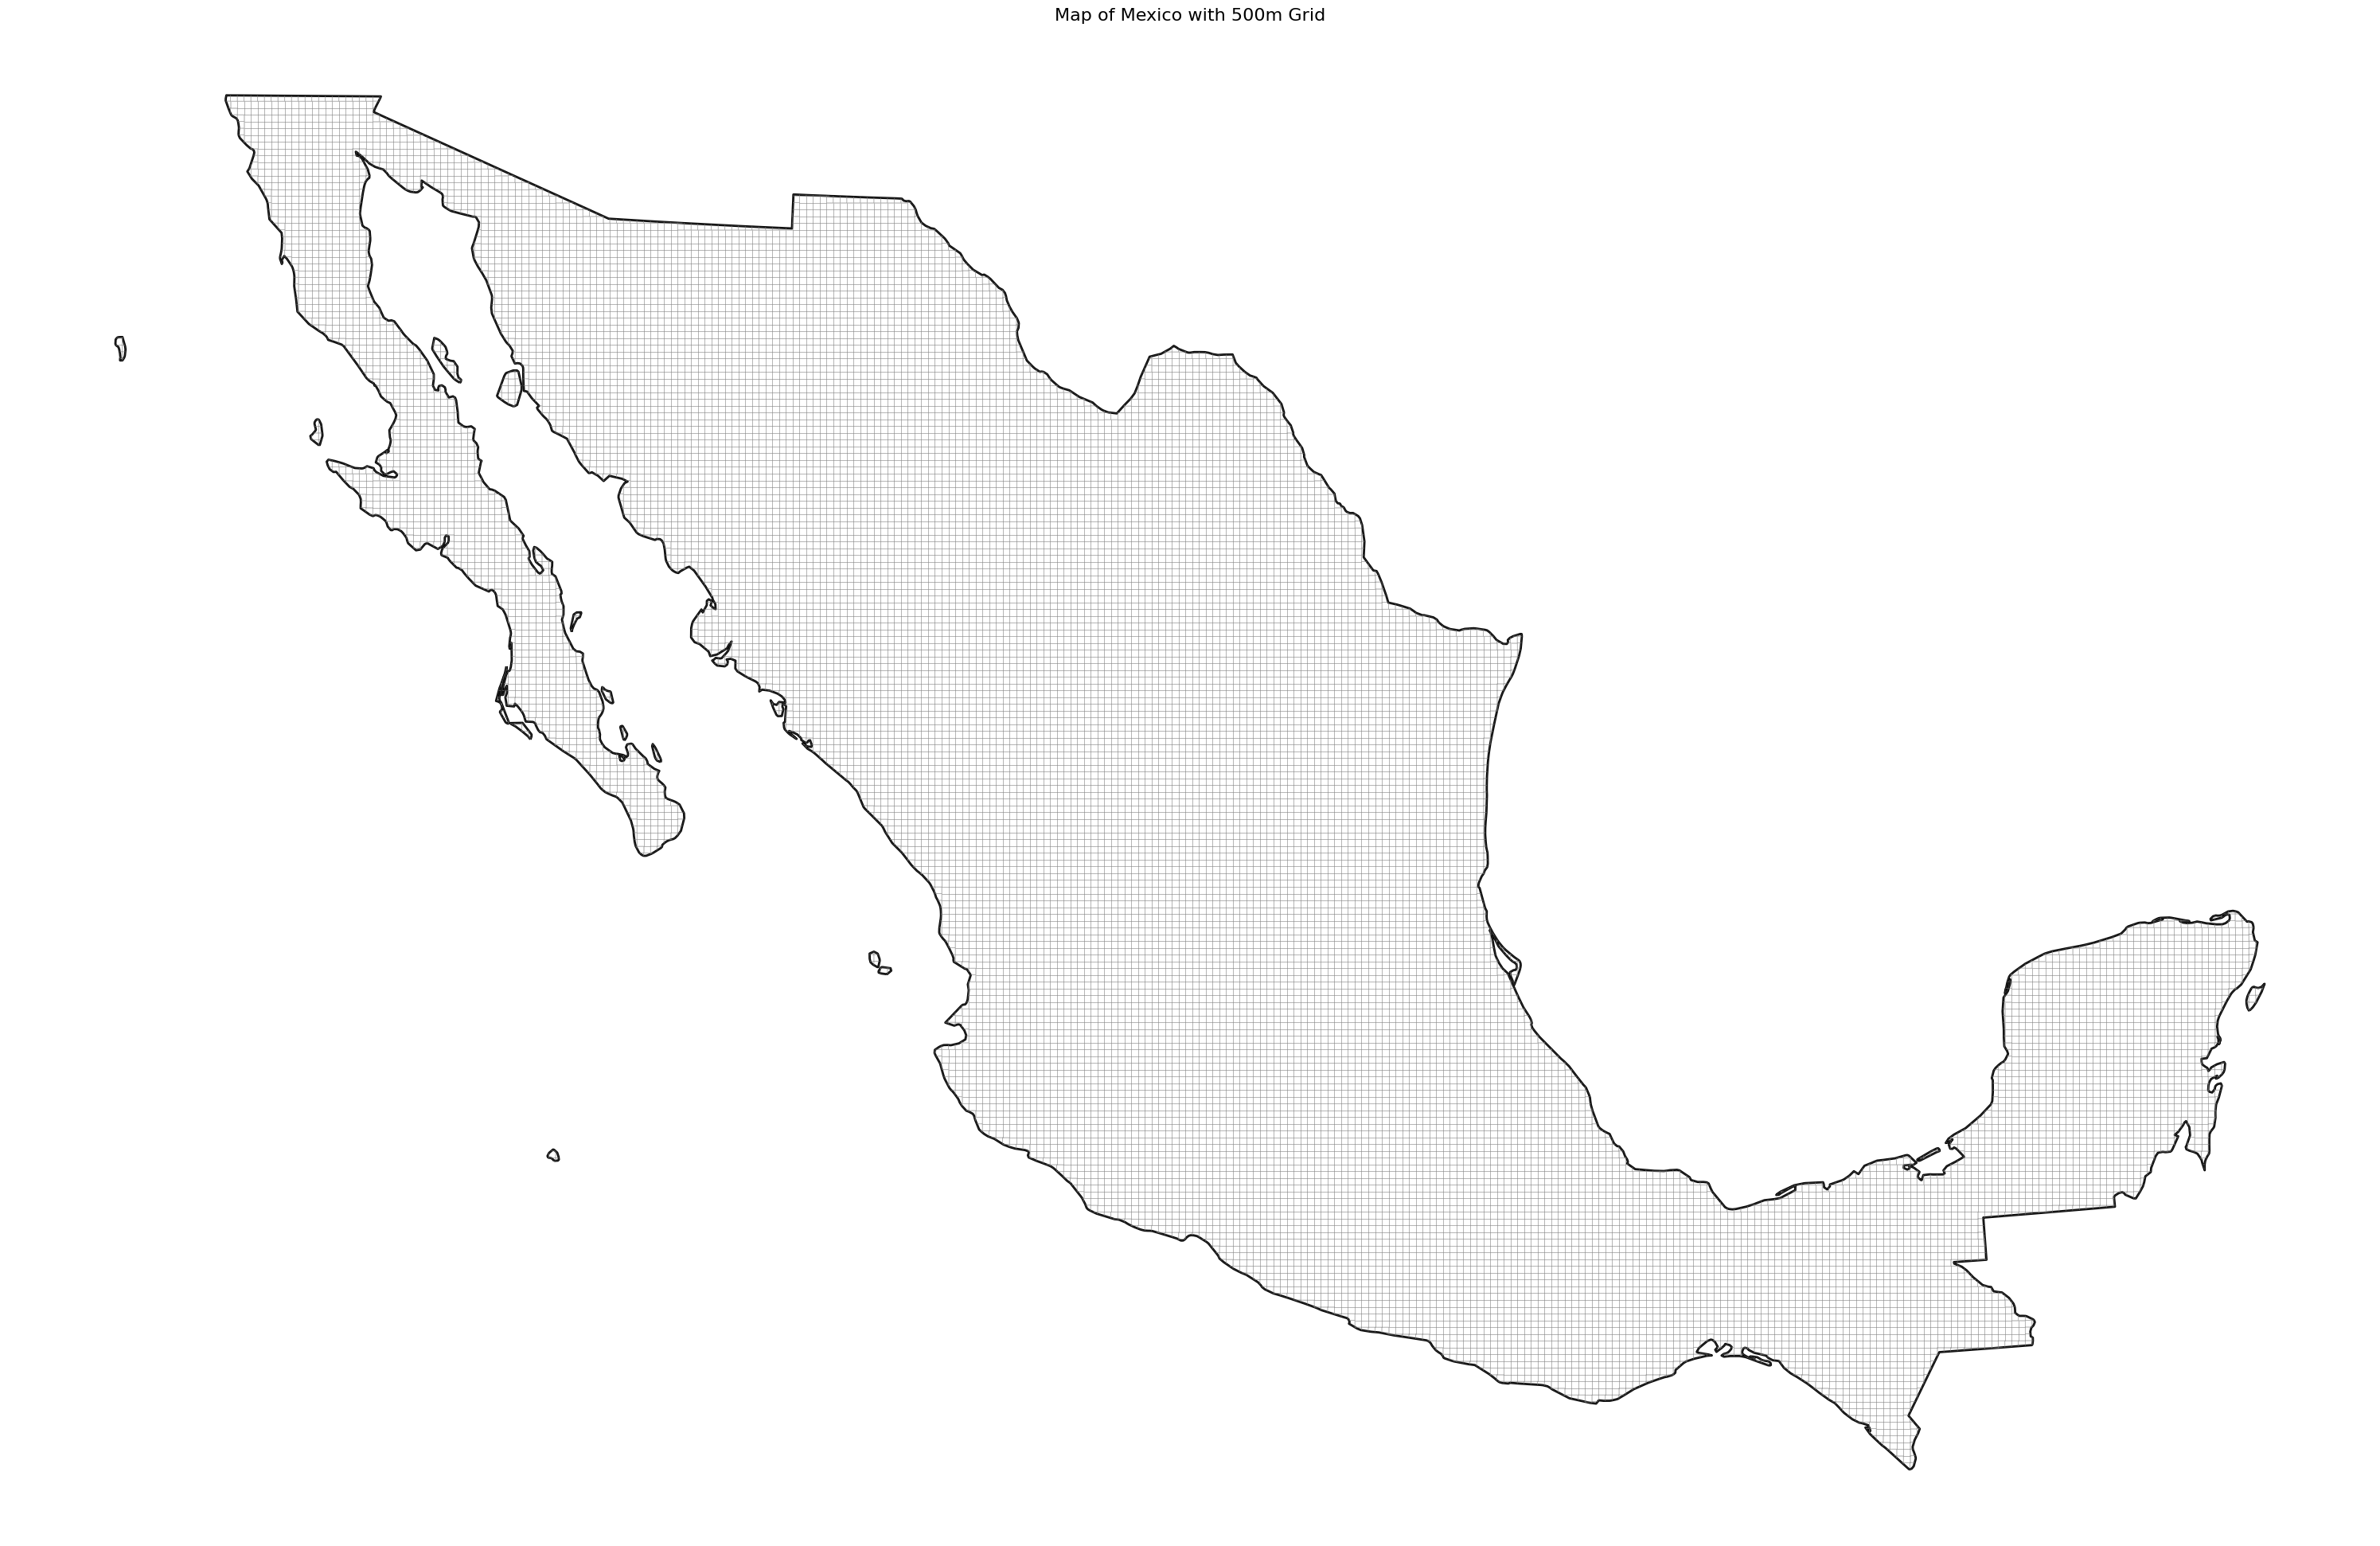

In [7]:
import numpy as np
from tqdm import tqdm
from shapely.geometry import box

mexico_utm = mexico.to_crs(epsg=6372)

# Get the bounds of Mexico in UTM coordinates
minx, miny, maxx, maxy = mexico_utm.total_bounds

# Create grid cells of 500m
cell_size = 10000  # meters
x_coords = np.arange(minx, maxx, cell_size)
y_coords = np.arange(miny, maxy, cell_size)

# Create grid cells
grid_cells = []
for x in tqdm(x_coords):
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)

# Create GeoDataFrame from grid
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=mexico_utm.crs)

print("starting clipping")
# Clip grid to Mexico's boundary
grid_clipped = gpd.clip(grid, mexico_utm)
print("done clipping")

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot Mexico
print("plotting mexico")
mexico_utm.plot(ax=ax, color='white', edgecolor='black', linewidth=2)

# Plot grid
print("plotting grid")
grid_clipped.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.5, linewidth=0.5)

# Customize the plot
plt.title('Map of Mexico with 500m Grid', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()